**Import Library dan File Unloading**

In [522]:
# 1. Import Library
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pickle
pd.set_option('display.max_columns', None)

In [523]:
#lakukan pembacaan dataset
movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv', sep='\t', on_bad_lines='warn') #untuk menyimpan title_basics.tsv
rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv', sep='\t', on_bad_lines='warn') #untuk menyimpan title.ratings.tsv

In [524]:
movie_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,\N,\N,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,\N,\N,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,\N,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,\N,\N,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,\N,\N,Documentary


In [525]:
movie_df.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",0,2014,\N,\N,Reality-TV,NaN
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,\N,\N,Reality-TV,NaN
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,\N,\N,\N,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,\N,\N,"Animation,Comedy,Drama",NaN
9024,tt9909210,tvEpisode,Politik und/oder Moral - Wie weit geht das Ver...,0,2005,\N,\N,\N,NaN


In [526]:
rating_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1608
1,tt0000002,6.0,197
2,tt0000003,6.5,1285
3,tt0000004,6.1,121
4,tt0000005,6.1,2050


In [527]:
print('info dataset movie_df: ', movie_df.info())
print('info dataset rating_df: ', rating_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9025 entries, 0 to 9024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          9025 non-null   object
 1   titleType       9025 non-null   object
 2   primaryTitle    9011 non-null   object
 3   originalTitle   9011 non-null   object
 4   isAdult         9025 non-null   int64 
 5   startYear       9025 non-null   object
 6   endYear         9025 non-null   object
 7   runtimeMinutes  9025 non-null   object
 8   genres          9014 non-null   object
dtypes: int64(1), object(8)
memory usage: 634.7+ KB
info dataset movie_df:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030009 entries, 0 to 1030008
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1030009 non-null  object 
 1   averageRating  1030009 non-null  float64
 2   numVotes       1030009 non-n

In [528]:
print(movie_df.isnull().sum())
print(rating_df.isnull().sum())

tconst             0
titleType          0
primaryTitle      14
originalTitle     14
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            11
dtype: int64
tconst           0
averageRating    0
numVotes         0
dtype: int64


**Data Cleansing**

In [529]:
# Mengisi nilai null dengan 'Unknown' untuk kolom primaryTitle, originalTitle, dan genres
movie_df['primaryTitle'] = movie_df['primaryTitle'].fillna('Unknown')
movie_df['originalTitle'] = movie_df['originalTitle'].fillna('Unknown')
movie_df['genres'] = movie_df['genres'].fillna('Unknown')

# Alternatif: Menghapus baris dengan nilai null
# movie_df = movie_df.dropna(subset=['primaryTitle', 'originalTitle', 'genres'])

# Verifikasi bahwa tidak ada lagi nilai null
print("Jumlah nilai null setelah penanganan:")
print(movie_df.isnull().sum())

Jumlah nilai null setelah penanganan:
tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64


In [530]:
# Konversi kolom startYear, endYear, dan runtimeMinutes ke numerik, ubah '\N' menjadi NaN
movie_df['startYear'] = pd.to_datetime(movie_df['startYear'], errors='coerce').dt.year
movie_df['runtimeMinutes'] = pd.to_numeric(movie_df['runtimeMinutes'], errors='coerce')

# Verifikasi tipe data setelah konversi
print("\nTipe data setelah konversi:")
print(movie_df.dtypes)

# Opsional: Cek jumlah NaN setelah konversi
print("\nJumlah nilai NaN setelah konversi:")
print(movie_df[['startYear', 'runtimeMinutes']].isnull().sum())


Tipe data setelah konversi:
tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear         float64
endYear            object
runtimeMinutes    float64
genres             object
dtype: object

Jumlah nilai NaN setelah konversi:
startYear          673
runtimeMinutes    6431
dtype: int64


In [531]:
movie_df.head(15)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898.0,\N,NaN,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018.0,\N,NaN,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016.0,\N,29.0,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987.0,\N,NaN,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973.0,\N,NaN,Documentary
5,tt0043745,short,Lion Down,Lion Down,0,1951.0,\N,7.0,"Animation,Comedy,Family"
6,tt1009561,tvEpisode,Saikyô no kikku chîmu,Saikyô no kikku chîmu,0,2006.0,\N,23.0,"Animation,Comedy,Drama"
7,tt5038380,tvMovie,(Working) Holiday,(Working) Holiday,0,2015.0,\N,23.0,Comedy
8,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998.0,\N,85.0,Adult
9,tt7201644,tvEpisode,Episode #1.33,Episode #1.33,0,2006.0,\N,45.0,"Drama,Romance"


In [532]:
print(movie_df.isnull().sum())

tconst               0
titleType            0
primaryTitle         0
originalTitle        0
isAdult              0
startYear          673
endYear              0
runtimeMinutes    6431
genres               0
dtype: int64


In [533]:
# 1. Drop kolom endYear karena hampir semua nilai NaN
movie_df = movie_df.drop(columns=['endYear'])

In [534]:
# 2. Tangani NaN di runtimeMinutes (contoh: isi dengan median)
median_runtime = movie_df['runtimeMinutes'].median()
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].fillna(median_runtime)

In [535]:
# Verifikasi hasil
print("Jumlah nilai NaN setelah penanganan:")
print(movie_df.isnull().sum())
print("\nTipe data setelah penanganan:")
print(movie_df.dtypes)
print("\nData movie_df (5 baris pertama):")
movie_df.head(40)

Jumlah nilai NaN setelah penanganan:
tconst              0
titleType           0
primaryTitle        0
originalTitle       0
isAdult             0
startYear         673
runtimeMinutes      0
genres              0
dtype: int64

Tipe data setelah penanganan:
tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear         float64
runtimeMinutes    float64
genres             object
dtype: object

Data movie_df (5 baris pertama):


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898.0,30.0,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018.0,30.0,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016.0,29.0,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987.0,30.0,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973.0,30.0,Documentary
5,tt0043745,short,Lion Down,Lion Down,0,1951.0,7.0,"Animation,Comedy,Family"
6,tt1009561,tvEpisode,Saikyô no kikku chîmu,Saikyô no kikku chîmu,0,2006.0,23.0,"Animation,Comedy,Drama"
7,tt5038380,tvMovie,(Working) Holiday,(Working) Holiday,0,2015.0,23.0,Comedy
8,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998.0,85.0,Adult
9,tt7201644,tvEpisode,Episode #1.33,Episode #1.33,0,2006.0,45.0,"Drama,Romance"


In [536]:
# Cek baris mana yang startYear-nya masih NaN
missing_startYear = movie_df[movie_df['startYear'].isna()]
missing_startYear.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
33,tt7508580,tvEpisode,Papad Boondi nu Shaak,Papad Boondi nu Shaak,0,NaN,30.0,Family
35,tt5832388,tvEpisode,"Teen Wolf, Parks & Recreation, Melissa & Joey,...","Teen Wolf, Parks & Recreation, Melissa & Joey,...",0,NaN,30.0,Reality-TV
37,tt12142560,tvEpisode,Episode #1.622,Episode #1.622,0,NaN,30.0,Romance
53,tt11811102,tvEpisode,Episode #1.26,Episode #1.26,0,NaN,30.0,\N
58,tt9712296,short,Khwaabghah,Khwaabghah,0,NaN,30.0,Short
59,tt4013654,tvEpisode,Episode #2.43,Episode #2.43,0,NaN,30.0,"Drama,Musical,Romance"
65,tt8632334,tvEpisode,Quzheng,Quzheng,0,NaN,30.0,Animation
89,tt1036304,tvEpisode,Elimination Match 1,Elimination Match 1,0,NaN,30.0,Sport
122,tt12052602,tvEpisode,Episode #1.805,Episode #1.805,0,NaN,30.0,Comedy
130,tt7955666,movie,Pure Dead Brilliant,Pure Dead Brilliant,0,NaN,30.0,"Fantasy,Horror"


In [537]:
# Tangani kolom startYear pakai median
median_year = int(movie_df['startYear'].median())
movie_df['startYear'].fillna(median_year, inplace=True)

<ipython-input-537-785a969f3213>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_df['startYear'].fillna(median_year, inplace=True)


**DATA QUALITY**

In [538]:
# Verifikasi hasil
print("Jumlah nilai NaN setelah penanganan:")
print(movie_df.isnull().sum())
print("\nTipe data setelah penanganan:")
print(movie_df.dtypes)
print("\nData movie_df (5 baris pertama):")
movie_df.head(40)

Jumlah nilai NaN setelah penanganan:
tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
dtype: int64

Tipe data setelah penanganan:
tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear         float64
runtimeMinutes    float64
genres             object
dtype: object

Data movie_df (5 baris pertama):


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898.0,30.0,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018.0,30.0,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016.0,29.0,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987.0,30.0,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973.0,30.0,Documentary
5,tt0043745,short,Lion Down,Lion Down,0,1951.0,7.0,"Animation,Comedy,Family"
6,tt1009561,tvEpisode,Saikyô no kikku chîmu,Saikyô no kikku chîmu,0,2006.0,23.0,"Animation,Comedy,Drama"
7,tt5038380,tvMovie,(Working) Holiday,(Working) Holiday,0,2015.0,23.0,Comedy
8,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998.0,85.0,Adult
9,tt7201644,tvEpisode,Episode #1.33,Episode #1.33,0,2006.0,45.0,"Drama,Romance"


**Analisis Eksplorasi Data Awal**

In [539]:
print(movie_df['startYear'].value_counts().sort_index())

startYear
1895.0      1
1896.0      2
1898.0      2
1899.0      1
1900.0      3
         ... 
2017.0    505
2018.0    499
2019.0    431
2020.0    145
2021.0      6
Name: count, Length: 125, dtype: int64


**Insight** \
- Data mencakup rentang tahun 1895–2021.
- Puncak produksi di 2017 (505 judul), 2018 (499 judul), dan 2019 (431 judul).
- Produksi menurun drastis di 2020 (145 judul) dan 2021 (6 judul).
- Tahun awal (1895–1900) sangat sedikit (1–3 judul per tahun).

**Penjelasan:** \
- Distribusi menunjukkan lonjakan produksi film/serial di era modern, dengan puncak di 2017–2019, kemungkinan karena pertumbuhan platform streaming.
- Penurunan di 2020–2021 mungkin akibat pandemi COVID-19 yang mengganggu produksi.
- Data dari era awal (1895–1900) mencerminkan keterbatasan teknologi dan dokumentasi film pada masa itu.

In [540]:
print(movie_df.groupby('genres')['runtimeMinutes'].mean().sort_values())

genres
Animation,Romance,Short            1.0
Animation,Fantasy,Musical          1.0
Animation,Music,Sci-Fi             1.0
Animation,Fantasy,Short            3.0
Animation,Music,Short              3.5
                                 ...  
Documentary,History,Musical      100.0
Comedy,Romance,Western           103.0
Adult,Fantasy                    105.0
Drama,Musical                    112.0
Adventure,Documentary,History    151.0
Name: runtimeMinutes, Length: 530, dtype: float64


**Insight:** \
- Genre dengan durasi terpendek: Animasi pendek seperti Animation,Romance,Short (1 menit) dan Animation,Fantasy,Short (3 menit).
- Genre dengan durasi terpanjang: Adventure,Documentary,History (151 menit), Drama,Musical (112 menit), Adult,Fantasy (105 menit).

In [541]:
print(movie_df['isAdult'].value_counts())

isAdult
0       8749
1        265
2019       4
1981       1
2020       1
2004       1
2014       1
2015       1
1994       1
2005       1
Name: count, dtype: int64


In [542]:
# Keep hanya isAdult = 0 atau 1
movie_df = movie_df[movie_df['isAdult'].isin([0, 1])]

In [543]:
print(movie_df['isAdult'].value_counts())

isAdult
0    8749
1     265
Name: count, dtype: int64


**Proporsi Konten Dewasa vs Non-Dewasa (isAdult)** \

**Insight:** \
- Non-dewasa (0): 8,749 judul (97.1%).
- Dewasa (1): 265 judul (2.9%).

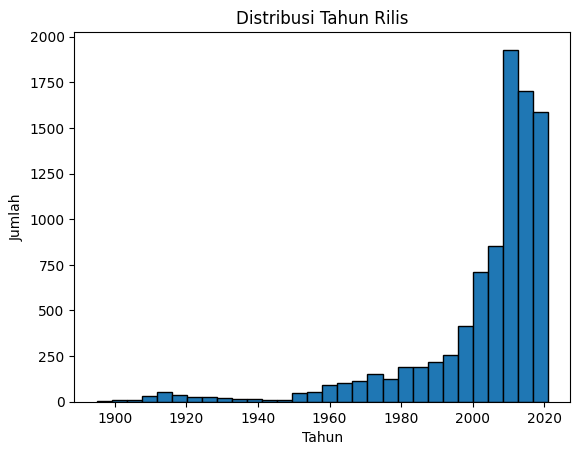

In [544]:
import matplotlib.pyplot as plt
plt.hist(movie_df['startYear'], bins=30, edgecolor='black')
plt.title('Distribusi Tahun Rilis')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.show()

**Insight:** \
- Histogram (dari kode plt.hist) kemungkinan menunjukkan distribusi yang miring ke kanan, dengan puncak di tahun 2010-an dan ekor panjang ke tahun 1890-an.
- Nilai unik startYear mencakup 1895–2021, dengan beberapa tahun hanya memiliki 1–3 judul (misalnya, 1895, 1899).

In [545]:
print(movie_df['startYear'].unique())

[1898. 2018. 2016. 1987. 1973. 1951. 2006. 2015. 1998. 2014. 2019. 2011.
 2004. 1913. 2017. 1969. 1975. 2013. 2012. 1967. 2003. 1955. 2010. 1991.
 2000. 1981. 2008. 2005. 2020. 1982. 1910. 1962. 1966. 1986. 2009. 1958.
 1932. 1992. 1996. 1989. 1994. 1985. 1953. 2007. 2001. 1970. 1964. 1999.
 1997. 1920. 1971. 1978. 2002. 1903. 1968. 1993. 1995. 1988. 1921. 1984.
 1963. 1895. 1965. 1979. 1952. 1976. 1983. 1974. 1977. 1972. 1946. 1908.
 1927. 1990. 1960. 1909. 1959. 1918. 1916. 1943. 1911. 1961. 1948. 1957.
 1923. 1934. 1956. 1941. 1899. 1950. 2021. 1904. 1896. 1936. 1914. 1944.
 1931. 1930. 1912. 1939. 1928. 1917. 1938. 1980. 1915. 1925. 1940. 1935.
 1922. 1933. 1924. 1907. 1902. 1954. 1919. 1929. 1926. 1901. 1900. 1906.
 1942. 1937. 1949. 1947. 1905.]


In [546]:
# Filter data untuk 2010–2019
movie_2010_2019 = movie_df[(movie_df['startYear'] >= 2010) & (movie_df['startYear'] <= 2019)]
movie_2010_2019.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018.0,30.0,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016.0,29.0,"Comedy,Game-Show"
7,tt5038380,tvMovie,(Working) Holiday,(Working) Holiday,0,2015.0,23.0,Comedy
10,tt9596238,tvEpisode,The Fappening II: Hacked Athlete Photos,The Fappening II: Hacked Athlete Photos,0,2014.0,30.0,Comedy
11,tt10598450,tvEpisode,Goldene Jahre,Goldene Jahre,0,2019.0,52.0,Documentary


In [568]:
# --- Simpan data yang sudah diproses ---
rating_df.to_csv('rating_df_dataclean.csv', index=False)

print("Data berhasil diproses dan disimpan ke 'rating_df_dataclean.csv'")

Data berhasil diproses dan disimpan ke 'rating_df_dataclean.csv'


**Data Merge**

In [547]:
merged_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')
print(merged_df.shape)  # Cek jumlah baris setelah penggabungan

(1376, 10)


In [548]:
merged_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0043745,short,Lion Down,Lion Down,0,1951.0,7.0,"Animation,Comedy,Family",7.1,459
1,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998.0,85.0,Adult,5.7,7
2,tt6574096,tvEpisode,Shadow Play - Part 2,Shadow Play - Part 2,0,2017.0,22.0,"Adventure,Animation,Comedy",8.5,240
3,tt6941700,tvEpisode,RuPaul Roast,RuPaul Roast,0,2017.0,30.0,Reality-TV,8.0,11
4,tt7305674,video,UCLA Track & Field Promo,UCLA Track & Field Promo,0,2017.0,30.0,"Short,Sport",9.7,7


In [549]:
print("Jumlah nilai NaN setelah merge:")
print(merged_df.isnull().sum())

Jumlah nilai NaN setelah merge:
tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
dtype: int64


**EDA Data Merge**

In [550]:
# Urutkan berdasarkan averageRating dan numVotes untuk menemukan film populer
popular_movies = merged_df.sort_values(by=['averageRating', 'numVotes'], ascending=False).head(10)

# Tampilkan hasil
print("Top 10 Film Populer 2010–2019 (Berdasarkan Rating dan Jumlah Suara):")
popular_movies[['primaryTitle', 'startYear', 'genres', 'averageRating', 'numVotes']].head(10)

Top 10 Film Populer 2010–2019 (Berdasarkan Rating dan Jumlah Suara):


,primaryTitle,startYear,genres,averageRating,numVotes
372,Coordinated Film,2019.0,Short,10.0,6
510,Episode dated 11 May 2001,2001.0,Drama,10.0,6
891,Episode dated 20 February 2001,2001.0,Drama,10.0,6
1034,Episode #10.4,2013.0,"Adventure,Documentary",9.8,37
79,Just Dance,2012.0,"Comedy,Documentary",9.8,15
1140,Sicilian Defense,2016.0,Mystery,9.7,32
473,Vidas Brasileiras,2018.0,"Comedy,Drama,Music",9.7,30
60,The Fort,2012.0,"Comedy,Documentary",9.7,14
4,UCLA Track & Field Promo,2017.0,"Short,Sport",9.7,7
1368,Agar Tum Saath Ho,2019.0,"Comedy,Drama,Romance",9.6,132


In [551]:
# Eksplorasi Genre: Korelasi Durasi Ekstrem dengan Rating dan Popularitas
# Definisikan genre dengan durasi ekstrem
short_genres = merged_df[merged_df['runtimeMinutes'] < 10][['genres', 'runtimeMinutes', 'averageRating', 'numVotes']]
long_genres = merged_df[merged_df['runtimeMinutes'] > 120][['genres', 'runtimeMinutes', 'averageRating', 'numVotes']]

# Hitung rata-rata rating dan jumlah suara per genre
short_genres_summary = short_genres.groupby('genres').agg({
    'runtimeMinutes': 'mean',
    'averageRating': 'mean',
    'numVotes': 'mean'
}).sort_values(by='averageRating', ascending=False)

long_genres_summary = long_genres.groupby('genres').agg({
    'runtimeMinutes': 'mean',
    'averageRating': 'mean',
    'numVotes': 'mean'
}).sort_values(by='averageRating', ascending=False)

# Tampilkan hasil
print("\nGenre dengan Durasi Pendek (<10 menit):")
print(short_genres_summary.head(10))
print("\nGenre dengan Durasi Panjang (>120 menit):")
print(long_genres_summary.head(10))

# Korelasi durasi dengan rating dan numVotes
correlation = merged_df[['runtimeMinutes', 'averageRating', 'numVotes']].corr()
print("\nKorelasi antara Durasi, Rating, dan Jumlah Suara:")
print(correlation)


Genre dengan Durasi Pendek (<10 menit):
                              runtimeMinutes  averageRating  numVotes
genres                                                               
Short,Western                            8.0            8.7       7.0
Crime,Short,Thriller                     4.0            8.4       5.0
Action,Comedy,Short                      7.0            8.1      16.0
Animation                                6.0            8.1       8.0
Comedy,Mystery                           9.0            8.0       6.0
Adventure,Animation,Comedy               3.0            8.0       6.0
Comedy,Short                             5.6            7.7      45.2
Comedy,Fantasy                           7.0            7.4      13.0
Comedy                                   6.0            7.3       6.0
Animation,Documentary,Family             8.0            7.3      75.0

Genre dengan Durasi Panjang (>120 menit):
                         runtimeMinutes  averageRating  numVotes
genres     

In [552]:
# Konten Dewasa: Pola Unik di Genre dan Rating
# Filter konten dewasa
adult_content = merged_df[merged_df['isAdult'] == 1]

# Distribusi genre untuk konten dewasa
adult_genres = adult_content['genres'].value_counts().head(10)

# Rata-rata rating dan numVotes untuk konten dewasa
adult_summary = adult_content.groupby('genres').agg({
    'averageRating': 'mean',
    'numVotes': 'mean'
}).sort_values(by='averageRating', ascending=False).head(10)

# Tampilkan hasil
print("\nDistribusi Genre untuk Konten Dewasa:")
print(adult_genres)
print("\nGenre Konten Dewasa dengan Rating Tertinggi:")
print(adult_summary)


Distribusi Genre untuk Konten Dewasa:
genres
Adult            23
\N                2
Adult,Fantasy     1
Name: count, dtype: int64

Genre Konten Dewasa dengan Rating Tertinggi:
               averageRating   numVotes
genres                                 
Adult,Fantasy       7.800000   5.000000
\N                  6.950000   6.000000
Adult               6.086957  11.391304


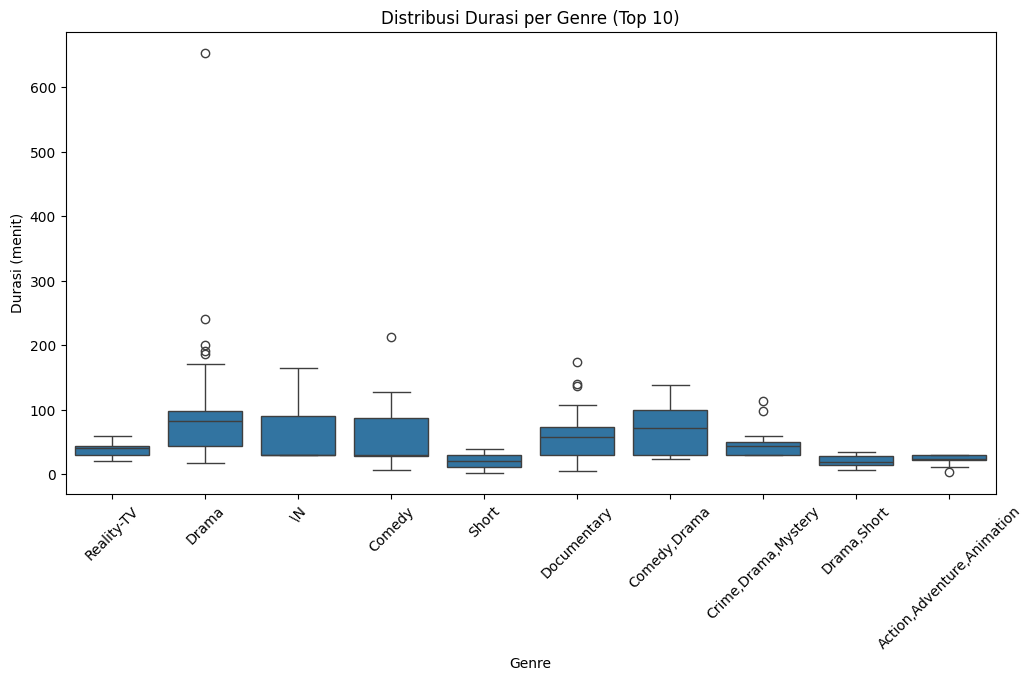

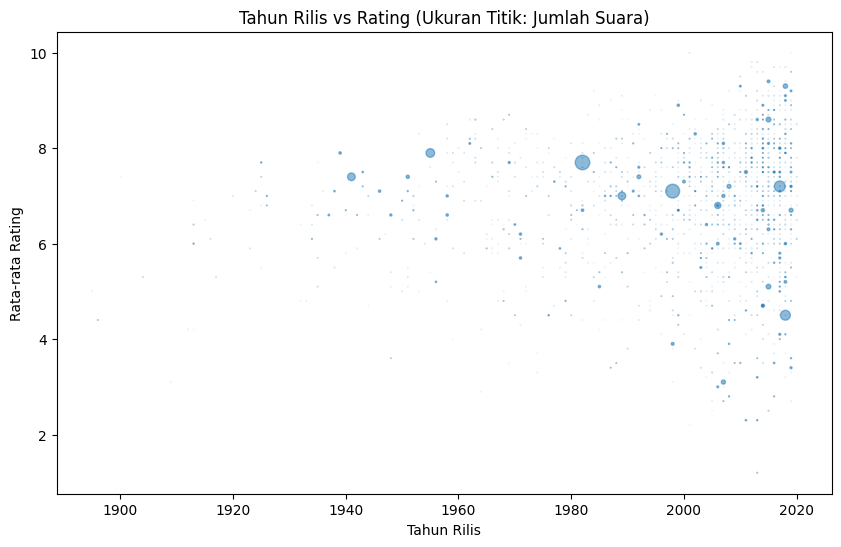

In [553]:
!pip install seaborn
import seaborn as sns

# Boxplot untuk runtimeMinutes per genre (top 10 genre terbanyak)
top_genres = merged_df['genres'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='runtimeMinutes', data=merged_df[merged_df['genres'].isin(top_genres)]) # Now sns is defined and can be used
plt.title('Distribusi Durasi per Genre (Top 10)')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Durasi (menit)')
plt.show()

# Scatter plot untuk startYear vs averageRating
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['startYear'], merged_df['averageRating'], alpha=0.5, s=merged_df['numVotes']/1000)
plt.title('Tahun Rilis vs Rating (Ukuran Titik: Jumlah Suara)')
plt.xlabel('Tahun Rilis')
plt.ylabel('Rata-rata Rating')
plt.show()

In [554]:
drama_df = merged_df[merged_df['genres'].str.contains('Drama')]
drama_df[['primaryTitle', 'averageRating', 'numVotes']].sort_values(by='averageRating', ascending=False).head(10)

,primaryTitle,averageRating,numVotes
891,Episode dated 20 February 2001,10.0,6
510,Episode dated 11 May 2001,10.0,6
473,Vidas Brasileiras,9.7,30
1368,Agar Tum Saath Ho,9.6,132
68,S.O.S. Part 2,9.4,3820
971,Clear Skies,9.4,9
254,Clearcut,9.3,44
1081,Episode #1.3,9.2,10
1181,Chapter Seventeen: The Missionaries,9.2,1536
186,El-Eicha,9.2,8


In [555]:
from textblob import TextBlob
merged_df['sentiment'] = merged_df['primaryTitle'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(merged_df[['primaryTitle', 'sentiment']].sort_values(by='sentiment', ascending=False).head(10))

                   primaryTitle  sentiment
938                The Best Man       1.00
1314           WWE Best of 2007       1.00
637             Wonderful World       1.00
89    Beautiful Dream: Daybreak       0.85
87                Brave Heart 2       0.80
776                 The Bar Fly       0.80
1085             Happy Birthday       0.80
410        The Great Depression       0.80
365    Campofrío: La tienda LOL       0.80
484       Joy Ride 3: Road Kill       0.80


**Building Simple Recommender System**

In [556]:
# 1. Popularity-Based Recommender
# Hitung skor popularitas menggunakan IMDB weighted rating formula
# WR = (v / (v + m)) * R + (m / (v + m)) * C
# R = averageRating, v = numVotes, m = minimum votes required, C = mean rating
C = merged_df['averageRating'].mean()
m = merged_df['numVotes'].quantile(0.9)  # Ambil 10% film dengan votes tertinggi

def weighted_rating(x, m=m, C=C):
    v = x['numVotes']
    R = x['averageRating']
    return (v / (v + m) * R) + (m / (v + m) * C)

merged_df['weighted_score'] = merged_df.apply(weighted_rating, axis=1)

# Urutkan berdasarkan weighted_score
popular_movies = merged_df.sort_values('weighted_score', ascending=False).head(10)

print("\n1. Top 10 Film Populer (Popularity-Based):")
popular_movies.head(10)


1. Top 10 Film Populer (Popularity-Based):


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,sentiment,weighted_score
1150,tt5807780,videoGame,Spider-Man,Spider-Man,0,2018.0,30.0,"Action,Adventure,Fantasy",9.3,10104,0.0,9.203459
68,tt4110822,tvEpisode,S.O.S. Part 2,S.O.S. Part 2,0,2015.0,43.0,"Action,Adventure,Drama",9.4,3820,0.0,9.150447
236,tt2200252,video,Attack of the Clones Review,Attack of the Clones Review,0,2010.0,86.0,Comedy,9.3,1411,0.0,8.744611
1181,tt7697962,tvEpisode,Chapter Seventeen: The Missionaries,Chapter Seventeen: The Missionaries,0,2019.0,54.0,"Drama,Fantasy,Horror",9.2,1536,0.0,8.701532
326,tt7124590,tvEpisode,Chapter Thirty-Four: Judgment Night,Chapter Thirty-Four: Judgment Night,0,2018.0,42.0,"Crime,Drama,Mystery",9.1,1859,0.0,8.690599
1045,tt0533506,tvEpisode,The Prom,The Prom,0,1999.0,60.0,"Action,Drama,Fantasy",8.9,2740,0.0,8.631283
1087,tt4295140,tvSeries,Chef's Table,Chef's Table,0,2015.0,50.0,Documentary,8.6,12056,0.0,8.542023
71,tt8399426,tvEpisode,Savages,Savages,0,2018.0,58.0,"Drama,Fantasy,Romance",9.0,1428,0.0,8.517656
1234,tt2843830,tvEpisode,VIII.,VIII.,0,2014.0,57.0,"Adventure,Drama",8.9,1753,0.0,8.509117
1054,tt2503932,tvEpisode,Trial and Error,Trial and Error,0,2013.0,43.0,"Drama,Fantasy,Horror",8.6,2495,0.0,8.351731


In [558]:
# 2. Content-Based Filtering
# Buat TF-IDF matrix untuk genres
from sklearn.metrics.pairwise import cosine_similarity # Import cosine_similarity here

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(merged_df['genres'].str.replace(',', ' '))

# Hitung cosine similarity antar film
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Fungsi rekomendasi berdasarkan judul film
def get_recommendations(title, cosine_sim=cosine_sim, df=merged_df, top_n=10):
    # Cari index film berdasarkan judul
    idx = df[df['primaryTitle'] == title].index
    if len(idx) == 0:
        return "Film tidak ditemukan!"
    idx = idx[0]

    # Dapatkan skor similarity
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Ambil top_n, skip film itu sendiri

    # Dapatkan index film yang mirip
    movie_indices = [i[0] for i in sim_scores]

    # Kembalikan film yang direkomendasikan
    return df.iloc[movie_indices][['primaryTitle', 'startYear', 'genres', 'averageRating', 'numVotes']]

In [560]:
# Contoh rekomendasi untuk film tertentu
example_movie = "Spider-Man"  # Ganti dengan judul film yang ada di dataset
print(f"\n2. Rekomendasi untuk Film '{example_movie}' (Content-Based):")
print(get_recommendations(example_movie))


2. Rekomendasi untuk Film 'Spider-Man' (Content-Based):
                                           primaryTitle  startYear  \
1150                                         Spider-Man     2018.0   
286                                          The Furies     2013.0   
1045                                           The Prom     1999.0   
1080  Crysis 2 vs. Call of Duty: Black Ops - The Ult...     2011.0   
69                                Richard The Lionheart     2013.0   
350    Everything I Can Do ... I CHOSE This Way of Life     2017.0   
1103                                                  X     1996.0   
252               Gortimer vs. The Friendship Bro-celet     2015.0   
157                                        Episode #1.1     2017.0   
953                                                Jajo     1984.0   

                        genres  averageRating  numVotes  
1150  Action,Adventure,Fantasy            9.3     10104  
286    Adventure,Drama,Fantasy            7.2       170 

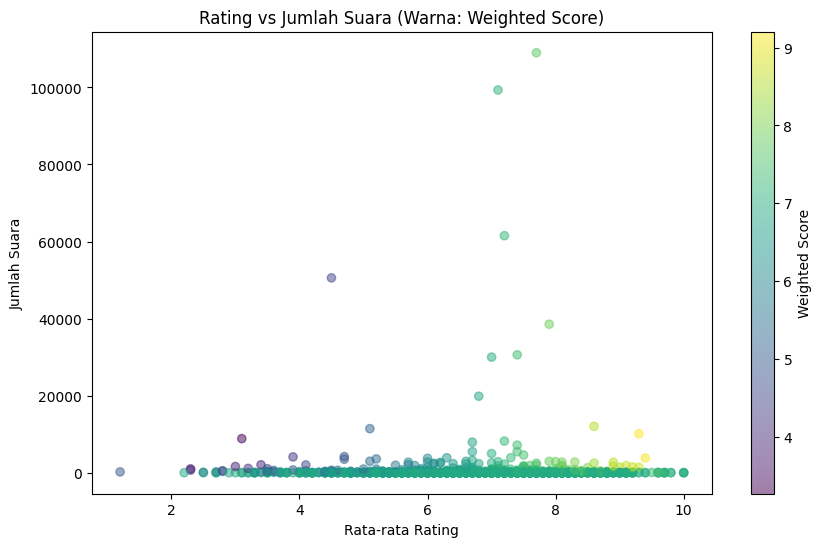

In [561]:
# 3. Visualisasi untuk Mendukung Rekomendasi
# Scatter plot: Rating vs numVotes untuk film populer
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['averageRating'], merged_df['numVotes'], alpha=0.5, c=merged_df['weighted_score'], cmap='viridis')
plt.title('Rating vs Jumlah Suara (Warna: Weighted Score)')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Jumlah Suara')
plt.colorbar(label='Weighted Score')
plt.show()

In [565]:
# Contoh rekomendasi untuk film tertentu
example_movie = "Chapter Seventeen: The Missionaries"  # Ganti dengan judul film yang ada di dataset
print(f"\n2. Rekomendasi untuk Film '{example_movie}' (Content-Based):")

recommendations = get_recommendations(example_movie)

# Check if recommendations is a string (indicating movie not found)
if isinstance(recommendations, str):
    print(recommendations)  # Print the "Film tidak ditemukan!" message
else:
    print(recommendations)
    print("\nRata-rata Rating Film yang Direkomendasikan:")
    print(recommendations['averageRating'].mean())


2. Rekomendasi untuk Film 'Chapter Seventeen: The Missionaries' (Content-Based):
                                           primaryTitle  startYear  \
544                                   The Little People     1962.0   
677                                         #JinnHunter     2019.0   
1054                                    Trial and Error     2013.0   
1181                Chapter Seventeen: The Missionaries     2019.0   
298   Skincrawlers/By the Silver Water of Lake Champ...     2019.0   
763            Children of the Corn V: Fields of Terror     1998.0   
1091                                       Love & Death     2017.0   
112                                 Pennies from Heaven     1998.0   
126                                Just One More Chance     1995.0   
157                                        Episode #1.1     2017.0   

                       genres  averageRating  numVotes  
544      Drama,Fantasy,Horror            8.1      1559  
677      Drama,Fantasy,Horror    

In [566]:
# --- Simpan data yang sudah diproses ---
merged_df.to_csv('processed_movie_data.csv', index=False)

print("Data berhasil diproses dan disimpan ke 'processed_movie_data.csv'")

Data berhasil diproses dan disimpan ke 'processed_movie_data.csv'
